### Load libraries

In [1]:
import geopandas as geopd
import pandas as pd
from shapely.geometry import box

- `import geopandas as geopd`: This line imports the geopandas library and assigns it the alias `geopd`. GeoPandas is used to handle geospatial data in Python.
- `import pandas as pd`: This line imports the pandas library and assigns it the alias `pd`. Pandas is used for data manipulation and analysis.
- `from shapely.geometry import box`: This line imports the `box` function from the `shapely.geometry` module. Shapely is a library for geometric operations, and the box function is used to create rectangular bounding boxes.

### Load San Luis Potosi metropolitan area (SLPMA) shape file  
Source: Marco Geoestadístico INEGI (2023).

#### URL: https://www.inegi.org.mx/temas/mg/ 

In [2]:
# INEGI data
gdf = geopd.read_file("../dataset/SLPMA/geometry/2023_1_24_A/2023_1_24_A.shp")

- `INEGI data`: This comment indicates that the following code deals with data from INEGI (Instituto Nacional de Estadística y Geografía), Mexico's National Institute of Statistics and Geography.
- `gdf = geopd.read_file("../dataset/SLPMA/geometry/2023_1_24_A/2023_1_24_A.shp")`: This line reads a shapefile using GeoPandas. The file path points to the shapefile on the disk, which contains geographic data for the San Luis Potosí Metropolitan Area (SLPMA). The read file is stored in the variable gdf as a GeoDataFrame, which supports spatial operations.

### Display data frame entries

- `CVE_ENT`: The CVE_ENT is the state code provided by INEGI. This code is a numeric identifier assigned to each of the 32 states in Mexico. It is used to organize and retrieve state-level data efficiently, facilitating geographic and statistical analyses across different regions of the country.
- `CVE_MUN`: The CVE_MUN is the municipality code provided by INEGI. Each of the over 2,400 municipalities in Mexico is assigned a unique CVE_MUN code. This code helps in distinguishing and managing data specific to each municipality, ensuring precise data collection, analysis, and governance within the broader framework of state and national statistics.
- `CVE_LOC`: The CVE_LOC is the location code provided by INEGI. This code is used to identify specific localities within municipalities, such as towns, villages, or cities. It allows for detailed geographic and demographic analysis at a finer scale, enabling the study of population distribution, infrastructure, and services within different localities.
- `CVE_AGEB`: The CVE_AGEB (Área Geoestadística Básica) is the code for geographic areas provided by INEGI. These areas are the smallest statistical units used for census and survey purposes in Mexico. The CVE_AGEB code facilitates detailed geographic and demographic analysis, helping to understand population dynamics, socio-economic conditions, and spatial patterns within urban and rural settings.
- `AMBITO`: The AMBITO attribute indicates whether an area is urban or rural. This classification helps in distinguishing between densely populated urban areas and sparsely populated rural areas, which often have different socio-economic characteristics, infrastructure, and development needs. Understanding whether an area is urban or rural is crucial for planning and implementing public policies, resource allocation, and service delivery.
- `geometry`: The geometry attribute contains the boundary information of each municipality as defined by INEGI. This information is typically represented as polygons, which outline the geographic area of the municipality. These polygons are essential for spatial analyses, mapping, and visualizations, as they define the physical extents of each municipality. The geometry data is used in geographic information systems (GIS) to overlay different data layers, analyze spatial relationships, and create detailed maps for various applications.

In [3]:
display(gdf)

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,AMBITO,geometry
0,2400100010198,24,001,0001,0198,Urbana,"POLYGON ((-101.15796 22.39861, -101.15829 22.3..."
1,2400100010200,24,001,0001,0200,Urbana,"POLYGON ((-101.15675 22.39860, -101.15675 22.3..."
2,2400100010107,24,001,0001,0107,Urbana,"POLYGON ((-101.16092 22.40463, -101.16092 22.4..."
3,2400100010111,24,001,0001,0111,Urbana,"POLYGON ((-101.16742 22.40622, -101.16756 22.4..."
4,2400100010145,24,001,0001,0145,Urbana,"POLYGON ((-101.16331 22.40754, -101.16353 22.4..."
...,...,...,...,...,...,...,...
1577,2405800010237,24,058,0001,0237,Urbana,"POLYGON ((-99.30914 22.53072, -99.30760 22.528..."
1578,2405800010218,24,058,0001,0218,Urbana,"POLYGON ((-99.33210 22.54050, -99.33291 22.540..."
1579,2405800010148,24,058,0001,0148,Urbana,"POLYGON ((-99.32573 22.52434, -99.32573 22.524..."
1580,2405800010133,24,058,0001,0133,Urbana,"POLYGON ((-99.33050 22.53016, -99.33043 22.530..."


- `display(gdf)`: This line displays the GeoDataFrame gdf. In a Jupyter notebook, this will render the GeoDataFrame as a table, showing its contents and structure.

### San Luis Potosi metropilitan area consist of two municipalities: San Luis Potosí and Soledad de Graciasno Sánchez (SGS)  
The San Luis Potosí Metropolitan Area, a vital economic and cultural region in central Mexico, includes the municipalities of San Luis Potosí and Soledad de Graciano Sánchez. These municipalities form the core of the state's urban landscape, driving its growth and development.

San Luis Potosí, the state capital, is a historical city founded in 1592 during the Spanish colonial period. It has grown into a bustling urban center with a population of over one million residents. The city is renowned for its colonial architecture, vibrant cultural scene, and significant economic activities, including manufacturing, trade, and services. It serves as a central hub for education and industry, housing numerous universities, research institutions, and industrial parks. The city's strategic location, well-connected by major highways and railroads, makes it a key logistical and commercial node in the region.

Soledad de Graciano Sánchez, commonly referred to as Soledad or SGS, is a rapidly growing municipality adjacent to San Luis Potosí. It has a population of over 300,000 people and serves as an essential residential and industrial area complementing the state capital. The municipality has experienced significant urbanization and industrialization, attracting investments in various sectors such as manufacturing, logistics, and services. Its close proximity to San Luis Potosí facilitates the integration of economic activities, contributing to the overall development of the metropolitan area.

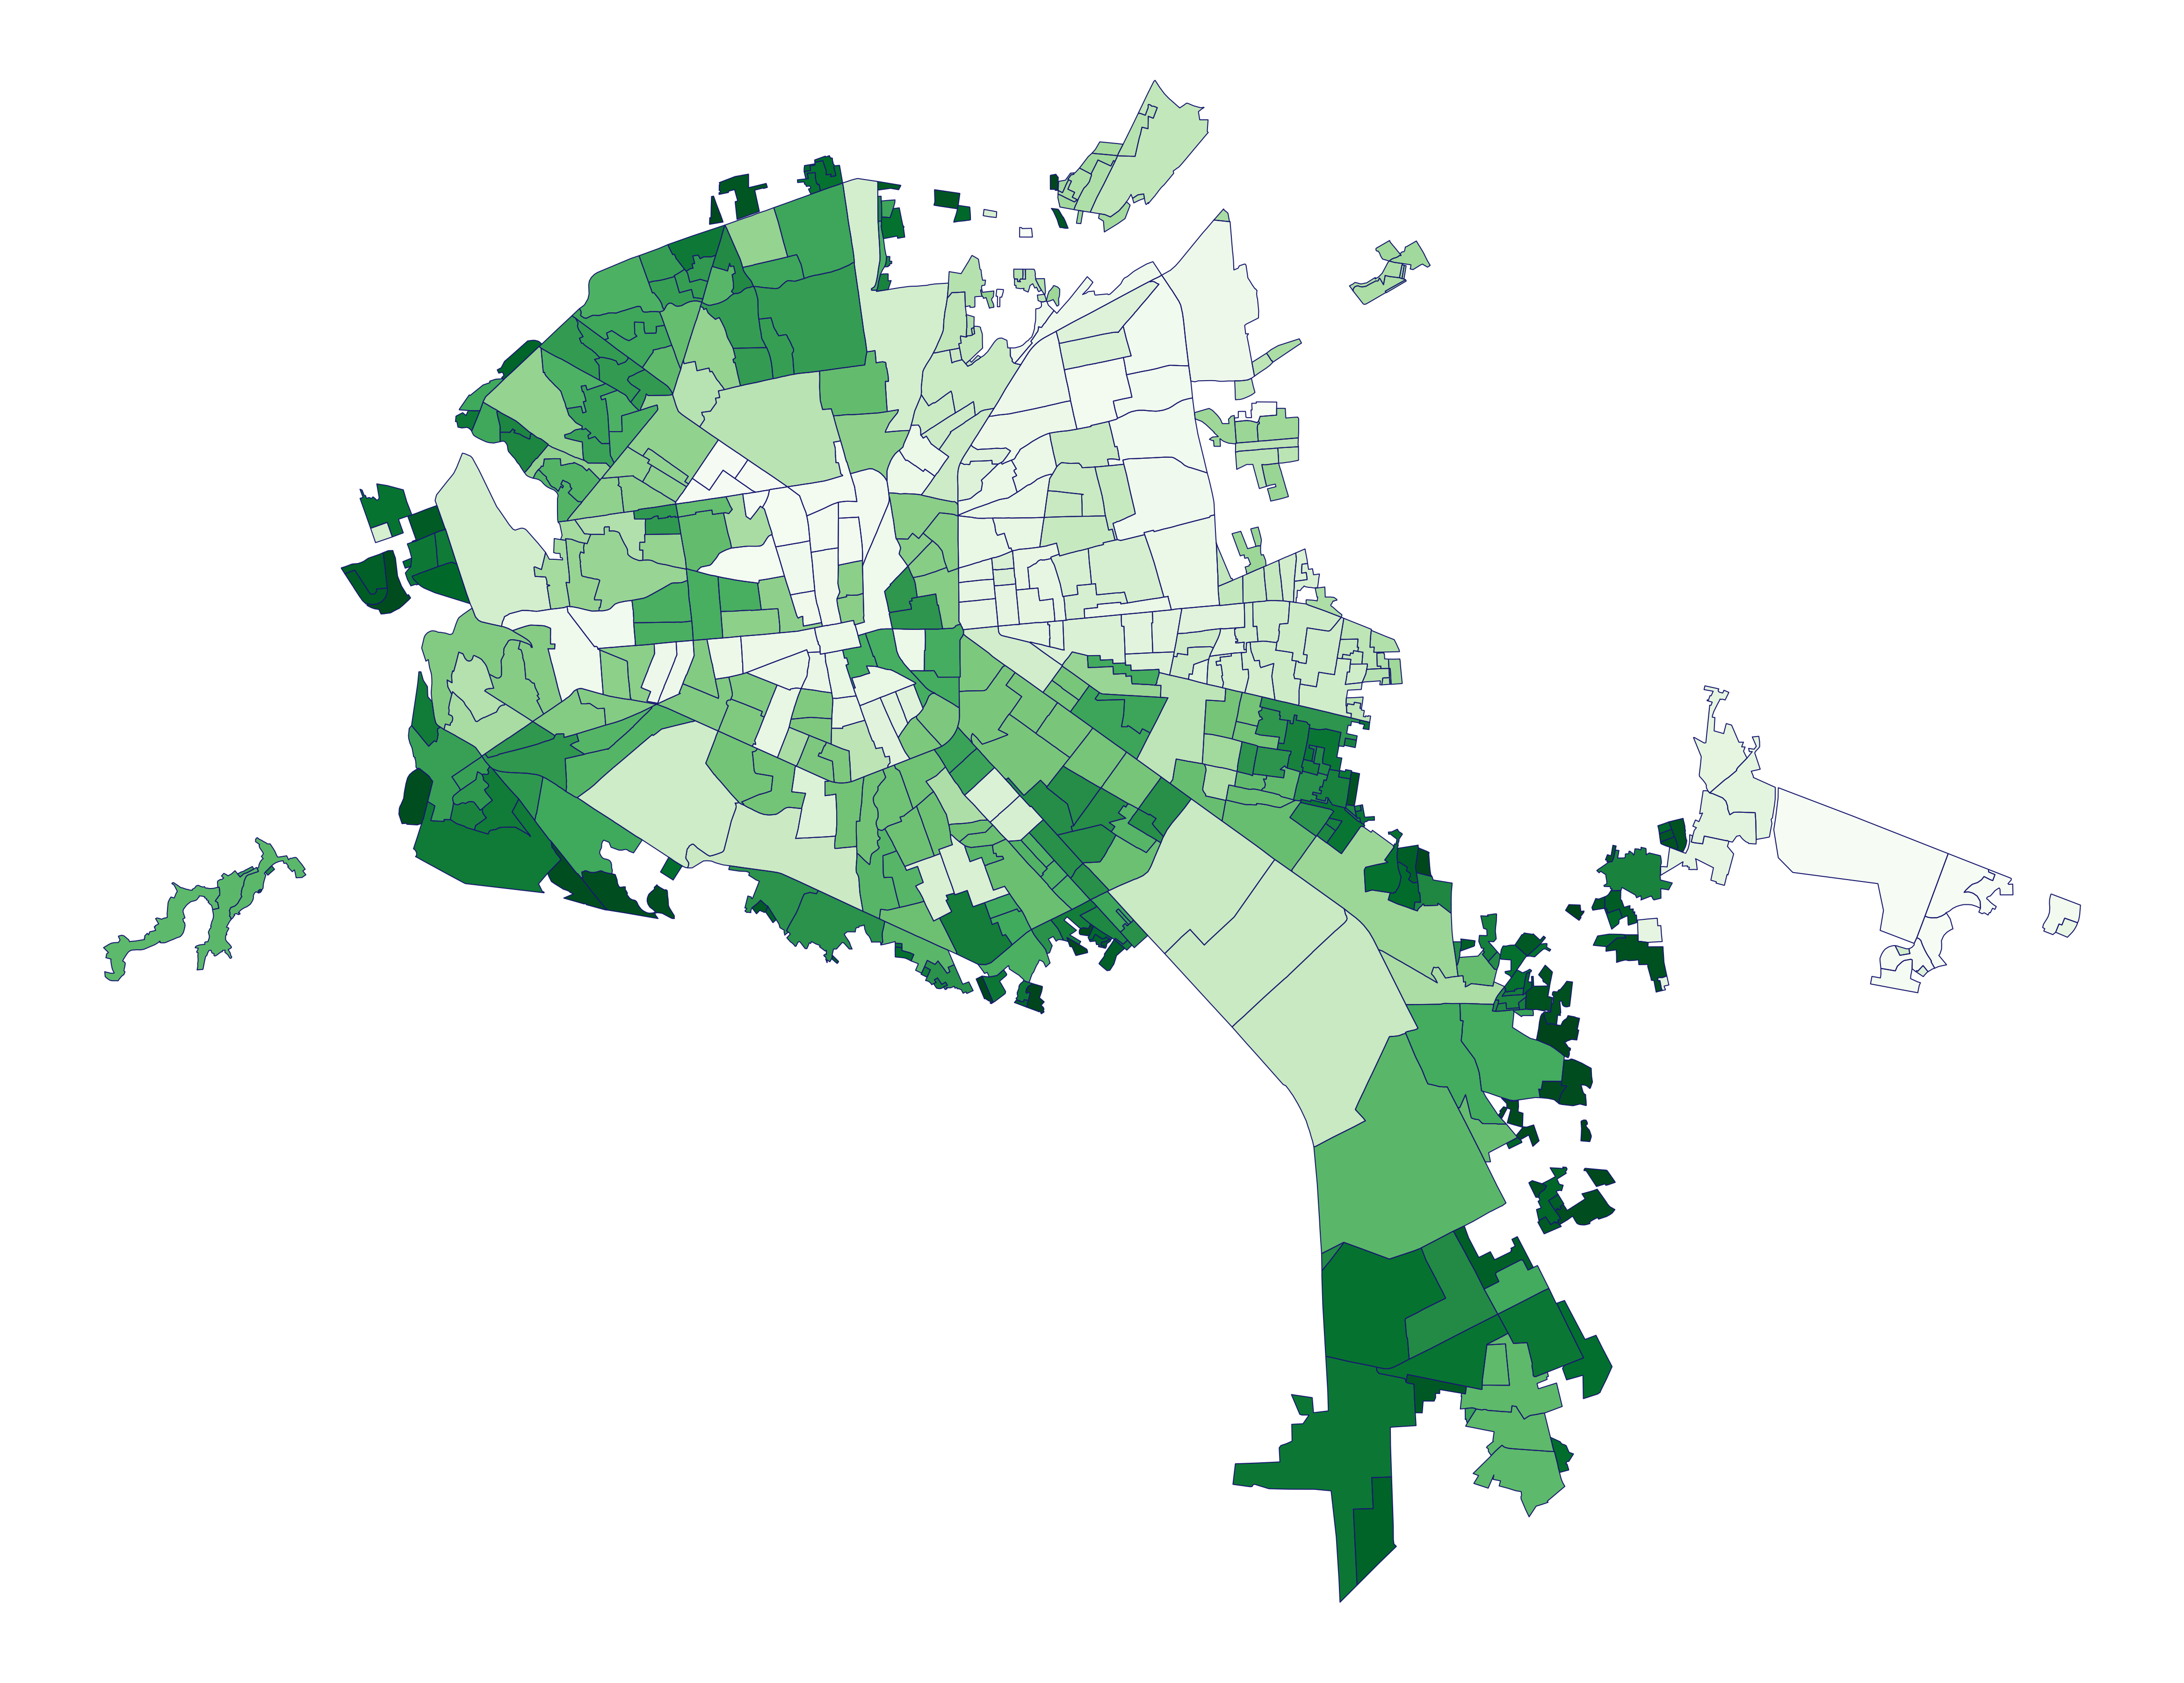

In [4]:
# SLPMA's map labeling each state by a color. 
# AGEBS are identified bya a CVE_ENT code

# SLP
gdf_slp = gdf[gdf["CVE_MUN"] == "028"]

#SGS
gdf_sgs = gdf[ gdf["CVE_MUN"] == "035"]

# Concatenate frames
frames = [gdf_slp, gdf_sgs ]
gdf_zmslp = pd.concat(frames)


# Plot AGEBS
ax = gdf_zmslp.plot(figsize = (60, 60), column="CVE_AGEB", cmap = "Greens")
ax.set_axis_off()

# Include AGEB outlines.
gdf_zmslp.boundary.plot(ax=ax,figsize = (60, 60), edgecolor='midnightblue')
ax.set_axis_off()



- `gdf_slp = gdf[gdf["CVE_MUN"] == "028"]`: This line filters the GeoDataFrame gdf to include only the rows where the CVE_MUN (municipality code) is "028", corresponding to San Luis Potosí. The filtered data is stored in `gdf_slp`.
- `gdf_sgs = gdf[gdf["CVE_MUN"] == "035"]`: This line filters the GeoDataFrame gdf to include only the rows where the CVE_MUN is "035", corresponding to Soledad de Graciano Sánchez. The filtered data is stored in `gdf_sgs`.
- `frames = [gdf_slp, gdf_sgs]`: This line creates a list of the two filtered GeoDataFrames, `gdf_slp` and `gdf_sgs`.
- `gdf_zmslp = pd.concat(frames)`: This line concatenates the list of GeoDataFrames into a single GeoDataFrame gdf_zmslp.

- `ax = gdf_zmslp.plot(figsize = (60, 60), column="CVE_AGEB", cmap = "Greens")`: This line creates a plot of the combined GeoDataFrame gdf_zmslp. The figsize = (60, 60) parameter sets the size of the plot. The column="CVE_AGEB" parameter specifies that the areas should be colored according to their CVE_AGEB code. The cmap = "Greens" parameter sets the color map to "Greens".
- `ax.set_axis_off()`: This line removes the axis from the plot for a cleaner visual representation.

- `gdf_zmslp.boundary.plot(ax=ax,figsize = (60, 60), edgecolor='midnightblue')`: This line adds the boundaries of the AGEBS to the existing plot. The ax=ax parameter specifies that the boundaries should be plotted on the same axes as the previous plot. The figsize = (60, 60) parameter is redundant here because the plot size is already set. The edgecolor='midnightblue' parameter sets the color of the boundaries to midnight blue.
- `ax.set_axis_off()`: This line removes the axis from the plot for a cleaner visual representation.

### Load stationary pollution sources data

#### Stationary pollution sources in SLP. Display data frame entries. Source DENUE-INEGI
#### URL: https://www.inegi.org.mx/app/mapa/denue/default.aspx

- `cve_ent`: The cve_ent is the state code provided by INEGI. This numeric identifier is assigned to each of the 32 states in Mexico. The cve_ent code is used to organize, retrieve, and analyze state-level data efficiently, facilitating geographic and statistical studies across the country. It ensures consistency and accuracy in identifying and managing data specific to each state.
- `nom_ent`: The nom_ent represents the municipality name as provided by INEGI. This is the official name of the municipality and is used in conjunction with its unique codes to provide a human-readable identifier for geographic and statistical records. The nom_ent is crucial for data interpretation and reporting, helping to locate and identify specific municipalities within the broader context of state and national statistics.
- `actividad`: The actividad attribute describes the type of industrial activity occurring at a specific location. This can include a wide range of activities such as manufacturing, processing, production, and other industrial operations. The actividad data is essential for understanding the economic landscape of a region, identifying the types of industries present, and assessing their potential impact on the environment and local communities.
- `geometry`: The geometry attribute contains the geographical coordinates, specifically the longitude and latitude, of a given location. These coordinates define the precise physical position of a point on the Earth's surface. In the context of pollution sources, the geometry data allows for the accurate mapping and spatial analysis of stationary pollution sources, facilitating the study of their distribution, proximity to populated areas, and potential environmental impact. The use of geographic coordinates ensures that the location data is precise and can be integrated into geographic information systems for further analysis and visualization.

In [5]:
df = pd.read_csv("../dataset/Mexico/stationary_pollution_sources/stationary_pollution_sources.csv")
df_slp = df[ df["cve_ent"] == 24 ] 
gdf_stationary_pullution_sources = geopd.GeoDataFrame(
    df_slp, geometry=geopd.points_from_xy(df_slp.X,df_slp.Y, crs="epsg:4326",
))

- `df = pd.read_csv("../../dataset/Mexico/stationary_pollution_sources/stationary_pollution_sources.csv")`: This line reads a CSV file containing data on stationary pollution sources into a pandas DataFrame df. The file path points to the location of the CSV file on the disk.
- `df_slp = df[ df["cve_ent"] == 24 ]`: This line filters the DataFrame df to include only the rows where the cve_ent (state code) is 24, which corresponds to San Luis Potosí. The filtered data is stored in `df_slp`.
- `gdf_stationary_pullution_sources = geopd.GeoDataFrame(df_slp, geometry=geopd.points_from_xy(df_slp.X,df_slp.Y, crs="epsg:4326"))`: This line creates a GeoDataFrame gdf_stationary_pullution_sources from the filtered DataFrame df_slp. The geometry parameter is used to create point geometries from the X and Y columns, which contain the longitude and latitude coordinates. The crs="epsg:4326" parameter sets the coordinate reference system to WGS 84 (the most commonly used geographic coordinate system).

In [6]:
display(gdf_stationary_pullution_sources)

,id,cve_ent,nom_ent,actividad,X,Y,Unnamed: 6,geometry
0,FQ1,24,San Luis Potosí,Fabricacion de Quimicos,-100.876628,22.102930,NaN,POINT (-100.87663 22.10293)
1,FQ2,24,San Luis Potosí,Fabricacion de Quimicos,-100.992320,22.166703,NaN,POINT (-100.99232 22.16670)
2,FQ3,24,San Luis Potosí,Fabricacion de Quimicos,-100.879019,22.069436,NaN,POINT (-100.87902 22.06944)
3,FQ4,24,San Luis Potosí,Fabricacion de Quimicos,-100.893507,22.061079,NaN,POINT (-100.89351 22.06108)
4,FQ5,24,San Luis Potosí,Fabricacion de Quimicos,-100.882499,22.071247,NaN,POINT (-100.88250 22.07125)
...,...,...,...,...,...,...,...,...
771,BIOTAMC03,24,San Luis Potosí,Biomasa,-98.814128,21.560987,NaN,POINT (-98.81413 21.56099)
772,BIOTANES01,24,San Luis Potosí,Biomasa,-98.663943,21.599224,NaN,POINT (-98.66394 21.59922)
773,BIOTANES02,24,San Luis Potosí,Biomasa,-98.662509,21.600438,NaN,POINT (-98.66251 21.60044)
774,BIOTANES03,24,San Luis Potosí,Biomasa,-98.661218,21.604151,NaN,POINT (-98.66122 21.60415)


- `display(gdf_stationary_pullution_sources)`: This line displays the GeoDataFrame `gdf_stationary_pullution_sources`. In a Jupyter notebook, this will render the GeoDataFrame as a table, showing its contents and structure.

### Plot stationary pollution sources on SLPMA map.

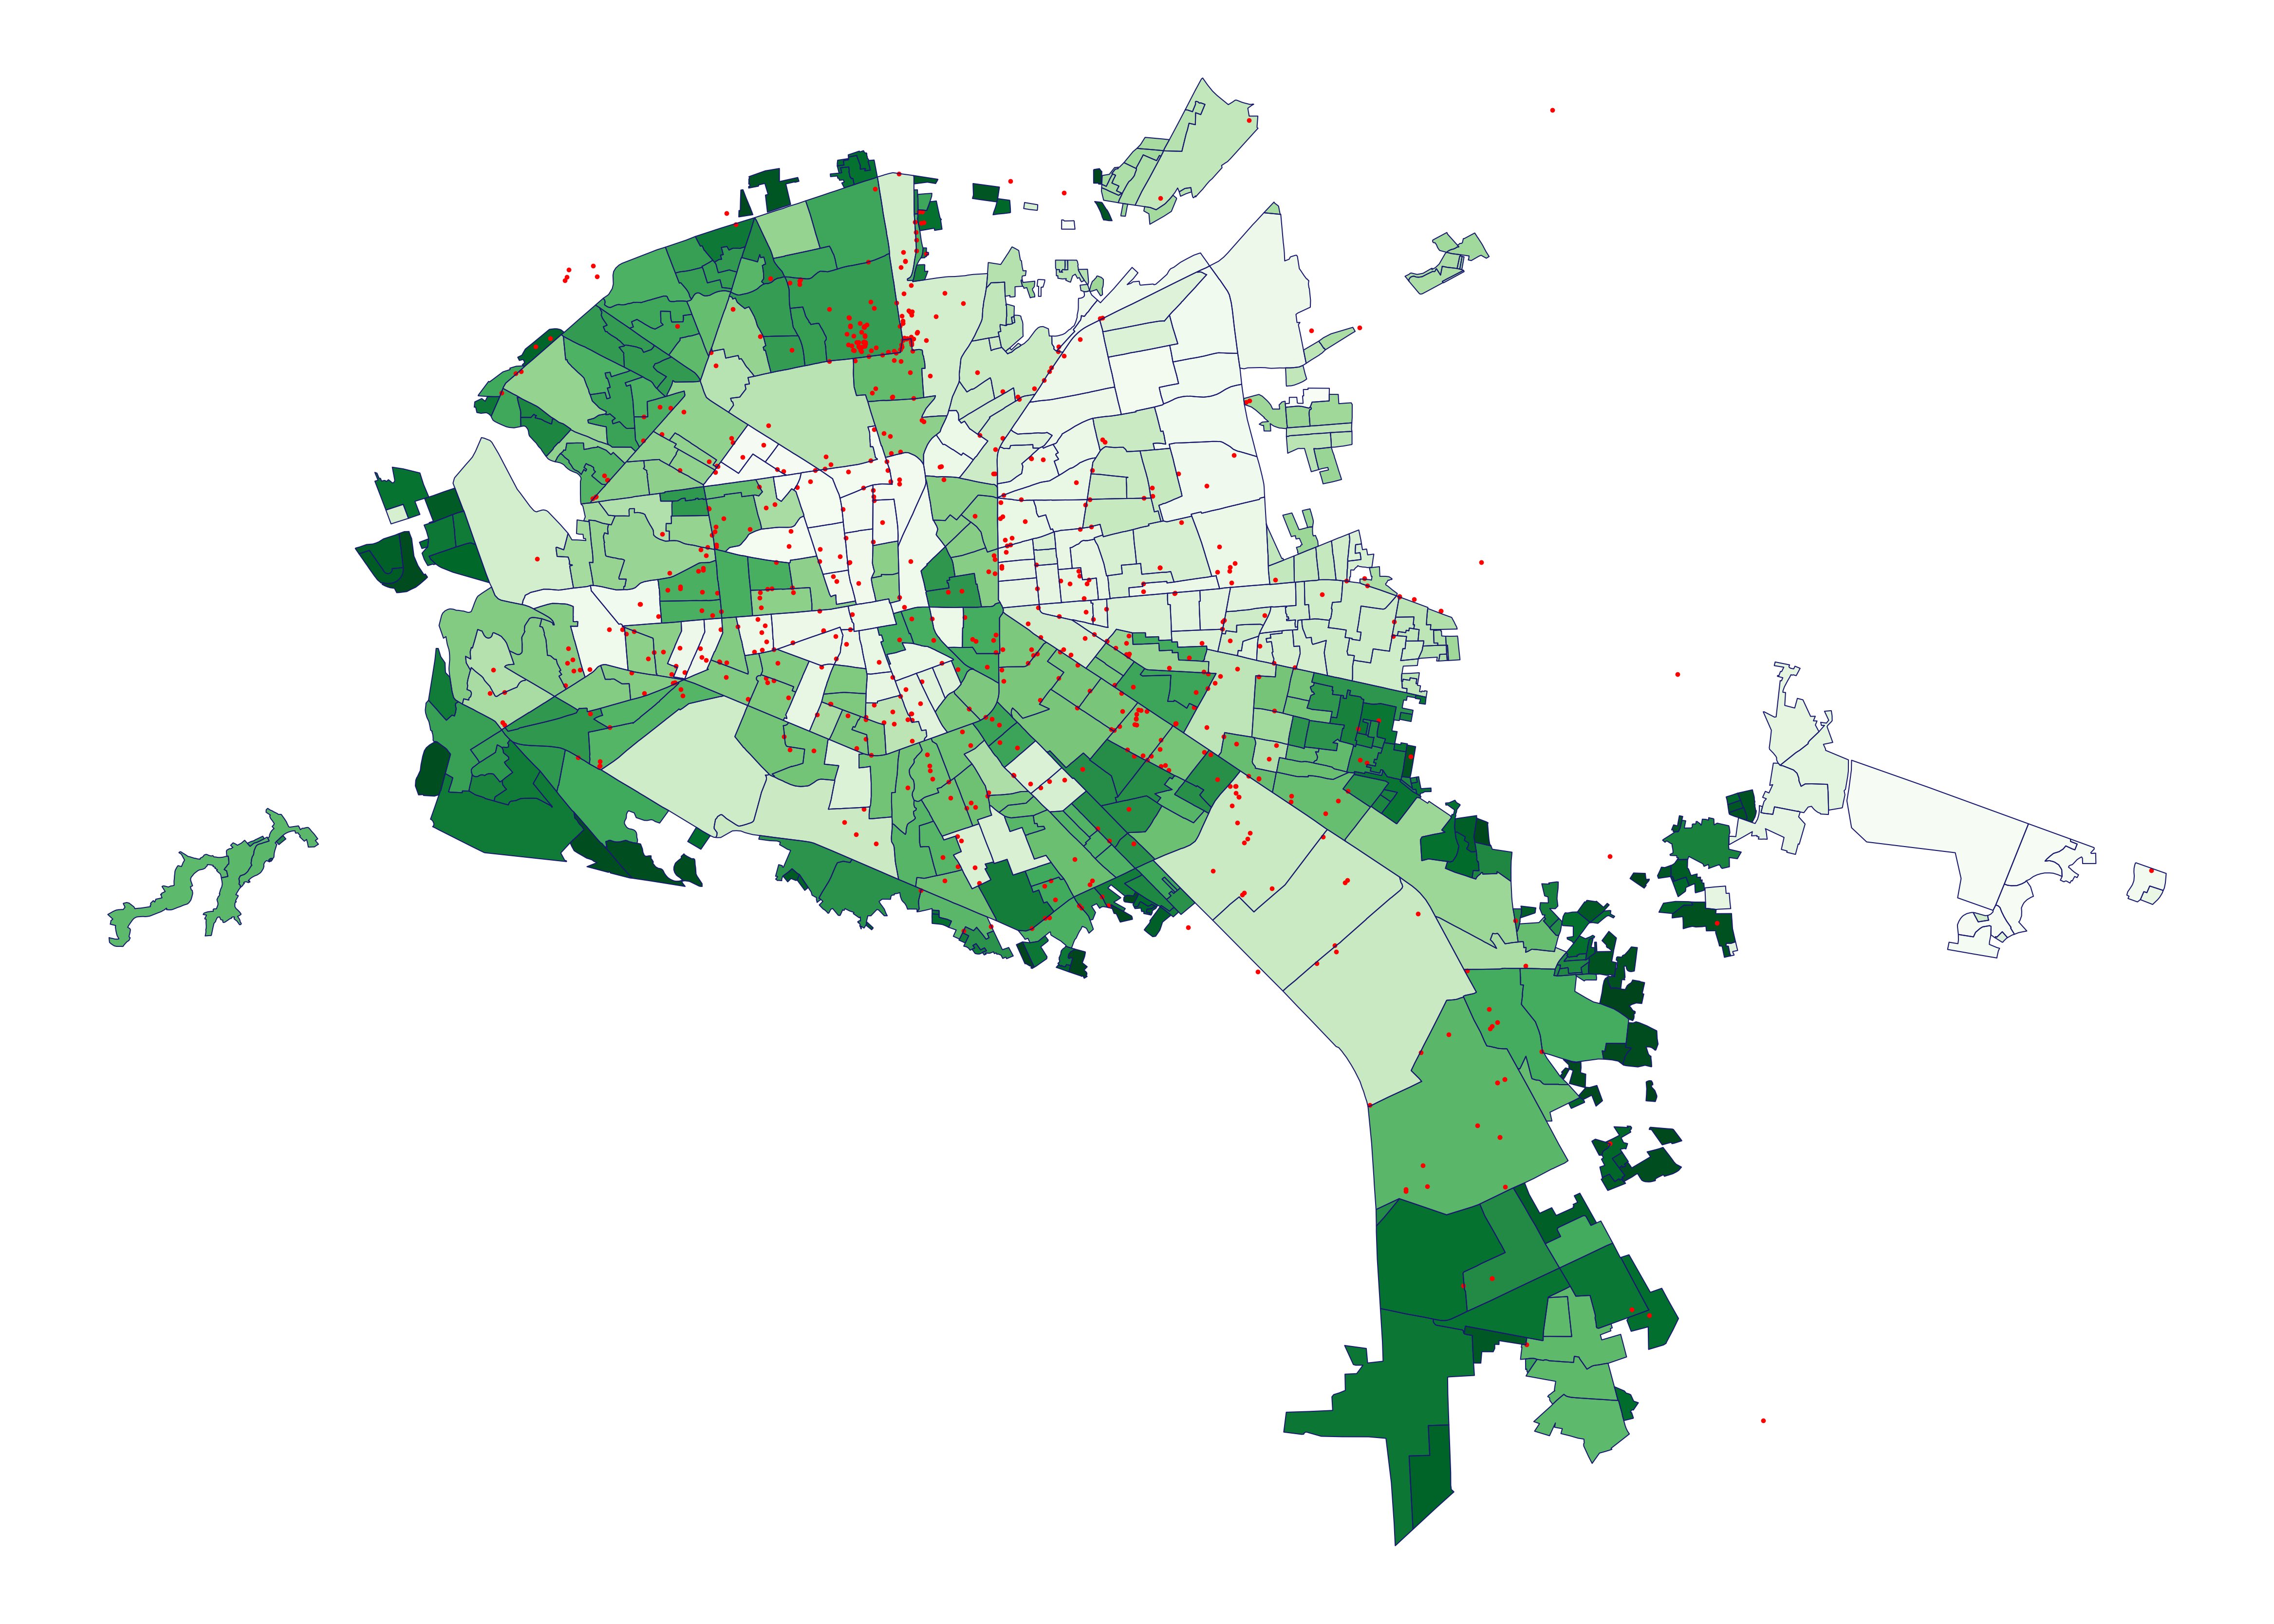

In [7]:
# Clip data to include sources inside SLPMA
minx, miny, maxx, maxy = gdf_zmslp.geometry.total_bounds
bbox = box(minx,miny,maxx,maxy)
gdf_stationary_pullution_sources_clipped = gdf_stationary_pullution_sources.clip(bbox)

# Plot AGEBS and AGEB outlines.
ax = gdf_zmslp.plot(figsize = (60, 60), column="CVE_AGEB", cmap = "Greens")
ax = gdf_zmslp.boundary.plot(ax=ax,figsize = (60, 60), edgecolor='midnightblue')

gdf_stationary_pullution_sources_clipped.plot(ax=ax,figsize = (100, 100),aspect=1, color="red")
ax.set_axis_off()

- `minx, miny, maxx, maxy = gdf_zmslp.geometry.total_bounds`: This line calculates the total bounding box of the combined GeoDataFrame `gdf_zmslp`, which contains the geometries of the selected municipalities. The bounding box is defined by its minimum and maximum x (longitude) and y (latitude) coordinates.
- `bbox = box(minx, miny, maxx, maxy)`: This line creates a rectangular bounding box using the `box` function from Shapely, defined by the coordinates calculated in the previous line.
- `gdf_stationary_pullution_sources_clipped = gdf_stationary_pullution_sources.clip(bbox)`: This line clips the GeoDataFrame `gdf_stationary_pullution_sources` to include only the points that fall within the bounding box bbox. The resulting clipped GeoDataFrame is stored in `gdf_stationary_pullution_sources_clipped`.

- `ax = gdf_zmslp.plot(figsize = (60, 60), column="CVE_AGEB", cmap = "Greens")`: This line creates a plot of the combined GeoDataFrame `gdf_zmslp`, coloring the areas by their CVE_AGEB code using the "Greens" color map. The figsize = (60, 60) parameter sets the size of the plot.
- `ax = gdf_zmslp.boundary.plot(ax=ax, figsize = (60, 60), edgecolor='midnightblue')`: This line adds the boundaries of the AGEBS to the existing plot, with the boundaries colored in midnight blue.
- `gdf_stationary_pullution_sources_clipped.plot(ax=ax, figsize = (100, 100), aspect=1, color="red")`: This line adds the clipped stationary pollution sources to the existing plot, with the points colored in red. The aspect=1 parameter ensures that the aspect ratio of the plot is maintained.
- `ax.set_axis_off()`: This line removes the axis from the plot for a cleaner visual representation.